In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
# load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# quick look at the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
# customerID is just an identifier, not useful for prediction
df = df.drop("customerID", axis=1)

# TotalCharges should be numeric, but it comes as text
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# remove rows with missing values after conversion
df = df.dropna()


In [35]:
# target variable
y = df["Churn"].map({"Yes": 1, "No": 0})

# features
X = df.drop("Churn", axis=1)

# one-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [37]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
# scale features for models that are sensitive to feature magnitude
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
# logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)


In [43]:
# random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [45]:
# accuracy scores
lr_acc = accuracy_score(y_test, y_pred_lr)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", lr_acc)
print("Random Forest Accuracy:", rf_acc)


Logistic Regression Accuracy: 0.7874911158493249
Random Forest Accuracy: 0.7853589196872779


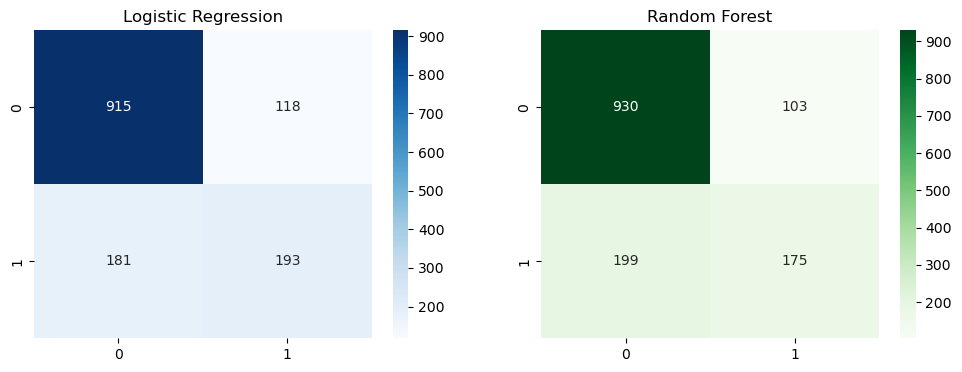

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True,
    fmt="d",
    cmap="Blues",
    ax=axes[0]
)
axes[0].set_title("Logistic Regression")

sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt="d",
    cmap="Greens",
    ax=axes[1]
)
axes[1].set_title("Random Forest")

plt.show()


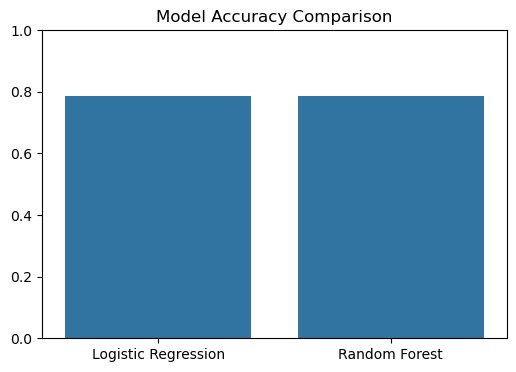

In [49]:
models = ["Logistic Regression", "Random Forest"]
accuracies = [lr_acc, rf_acc]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()


In [51]:
# detailed classification reports
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



### results summary

both models perform similarly on the churn prediction task.
random forest achieves slightly higher accuracy, while logistic regression provides a more interpretable baseline.

this highlights the trade-off between model complexity and interpretability.


In [54]:
results = pd.DataFrame({
    "model": ["Logistic Regression", "Random Forest"],
    "accuracy": [lr_acc, rf_acc]
})

results



,model,accuracy
0,Logistic Regression,0.787491
1,Random Forest,0.785359


### conclusion

this project compared two classification models on a customer churn dataset.
while both logistic regression and random forest achieved similar accuracy, their performance differed in how they handled churned customers.

logistic regression provided a strong and interpretable baseline, while random forest showed slightly improved precision.
this comparison demonstrates the importance of selecting models based on the business objective rather than accuracy alone.
